<h1>ELECTRICITY EXACHANGE PREDICTION</h1>

In this article we will cover step by step approximating data and neural network model evaluation for prediction electricity exchange.
This article have 2 stages
<li>Approximating data</li>
<li>Building pure neural network</li>


<h3><u>Approrximating data</u></h3>

On the of this project we are in front of the first problem and this problem is data.Data in 2024y is very expensive and lot of researchers withouth founding don't have access to real data from industry<br> or other related fields.Maybe on web we can find some data with little issiues and we need to do some data science techniques to get completed set of data.<br>
In this project data is general data is provided by <link><b>https://ourworldindata.org/</b></link>

This article will cover predicting data for countries from region.<br>
When we say region we mean all countries wich border with Serbia.<br>
But for evaluating model we will be focused on evaluate model for Serbia.It's very same for other countries becouse data is approximated for this usage.<br>
Disclaimer(we don't have real data for every day and hour).


All this data is mean this is electricity consumption in TWh.<br>
In next stages of project we will convert this to kWh and do some approximation.<br>
People who reading this article need to know this data is is merged from more then one resource.That mean data for country for example Serbia is covered in one dataset and we need to merge this,becouse our needs are like that.(We need this Balkan countries in one data set)<br>
Some of this data are not available.If you go to the site provided in description you can see for example Albania don't have value for the 2022th year and that's first place where we will use data science techniques for compleating data set.<br>
What we do in this situation.Use all other values from other year and average sum of this values to get value for this empty year.<br>
This technique is called <b>MEAN IMPUTATION</b><br>
<h5>We have 3 steps in this technique:</h5>
<li>Identify missing values</li>
<li>Calculate mean</li>
<li>Replace missing values</li> <br>
This technique is applied on both data sets.<br>
First data set is Electricity Consumption from 2005-2022.<br>
Second data set is Electricity Generation from 2005-2022.<br>
But we will focus on <b>SERBIA</b> and data in last 3(2k20 to 2k22) years becouse we don't have this computation power on local machine for this project.

In [8]:
import pandas as pd 
electricityGeneration = pd.read_csv("ElectricityGeneration.csv")
print(electricityGeneration.head(10).to_string())

                  Country  2005-Electricity-generation-TWh  2006-Electricity-generation-TWh  2007-Electricity-generation-TWh  2008-Electricity-generation-TWh  2009-Electricity-generation-TWh  2010-Electricity-generation-TWh  2011-Electricity-generation-TWh  2012-Electricity-generation-TWh  2013-Electricity-generation-TWh  2014-Electricity-generation-TWh  2015-Electricity-generation-TWh  2016-Electricity-generation-TWh  2017-Electricity-generation-TWh  2018-Electricity-generation-TWh  2019-Electricity-generation-TWh  2020-Electricity-generation-TWh  2021-Electricity-generation-TWh  2022-Electricity-generation-TWh
0                 Albania                             5.39                             5.04                             2.83                             3.83                             5.20                             7.49                             4.15                             4.68                             6.89                             4.68                         

This is how looks like data from electricity generation data set before approximation.<br>
It's very same for electricity gneration and in this samples we apply mean imputation.<br>

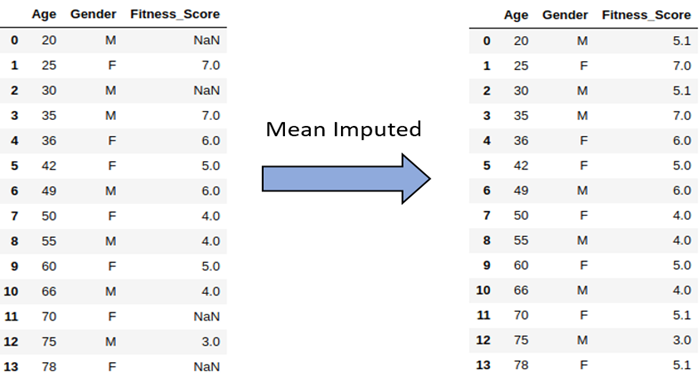

In [5]:
from IPython.display import Image, display
display(Image(filename='image.png'))

If you watch this data set in details you can see we don't have specific values for example for 1. January 2005. , we only have data for full year so wee need to do some approximation to get data all data.<br>First what we need to do is to define what is peek of energy usage.<br>
<b>Morning peak is from 6AM to 10AM</b>
<b>Evening peak is from 4PM to 10PM</b><br>
In other parts energy counsumption can be varriate but this article will focus on generaly prediction.<br>
This is very specific becouse we can focus on more then one part and build more complex model.<br>
One of dirrection where we can go is focus on specific days like new year or days where clock is changing.But this can be exstenssion of this project.<br>
This is generaly how peaks look like but it can be very varriate this is why we do some approximation becouse sometimes energy peak is more extended.<br>
That is reson why we use coefficients for generate variated type of values.Becouse we don't need data standard data this is not something what we can find in reality.<br>

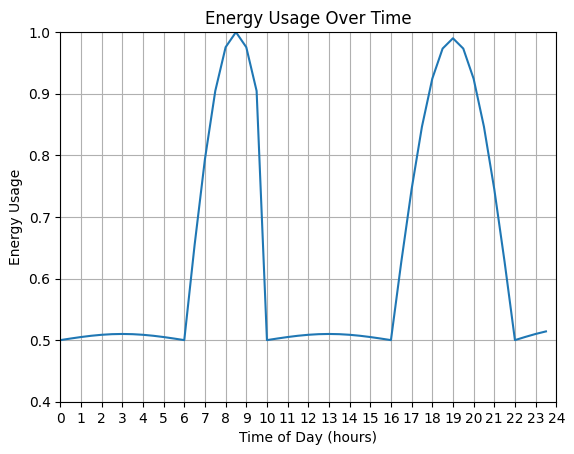

In [6]:
display(Image(filename='image01.png'))

Next thing is define peaks for energy generation.
In this article we will focus on 4 type of generating electricity.
<li>Termo</li>
<li>Wind</li>
<li>Solar</li>
<li>Hydro</li>
<br><br>
On graph you can see this peaks.
Termo peak :
<li>6AM to 9AM. Morning peak</li>
<li>5PM to 9PM. Evening peak</li>
<br><br>
Wind peak :
<li>12PM to 10AM. Morning peak</li>
<li>8PM to 12PM. Evening peak</li>
<br><br>
Solar peak :
<li>10AM to 2PM. Peak</li>
<br><br>
Hydro peak :<br>
Hydroelectricity generation is constant throught time but also they have peaks. <br><br>
<li>6AM to 10AM. Morning peak</li>
<li>6PM to 10PM. Evening peak</li>
<br><br>
On second graph we can see this function generalized.

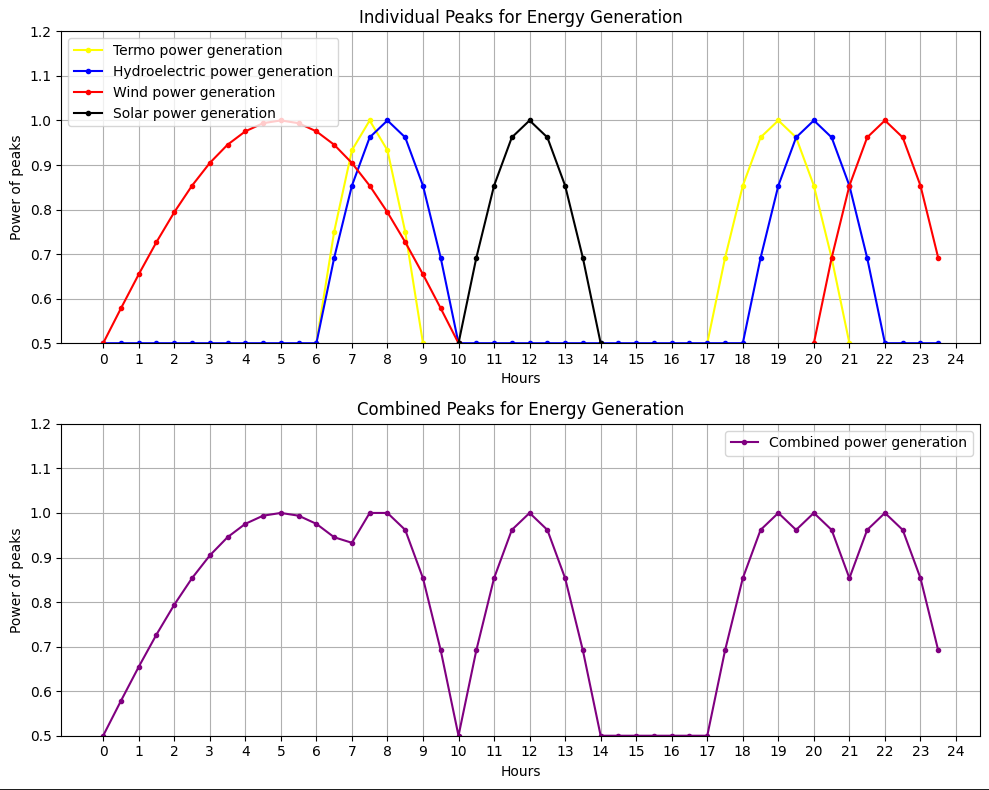

In [7]:
display(Image(filename='image02.png'))

So if we look on this diagram deeply we see some coeficients on y axis.<br>
This coeficients will help us to approximate data.<br>
Now you can understand how data is approximated and generalized.<br>


Script will generate data in this path but with some variation becouse we need something hard to neural network for prediction.<br>
But we will say in "normal day" generation and consuption will follow this path.<br>

Now you can see data for one specific day.

In [10]:
dataForOneDay = pd.read_csv("energy_merged_2020_01_01_Serbia.csv")
print(dataForOneDay.head(24).to_string())

          Date   Hour  EnergyUsage(TWh)  EnergyGeneration(TWh) Country
0   2020-01-01   0:00          0.000731               0.002150  Serbia
1   2020-01-01   1:00          0.000736               0.002562  Serbia
2   2020-01-01   2:00          0.000721               0.002995  Serbia
3   2020-01-01   3:00          0.000725               0.003445  Serbia
4   2020-01-01   4:00          0.000734               0.003803  Serbia
5   2020-01-01   5:00          0.000879               0.004293  Serbia
6   2020-01-01   6:00          0.001030               0.004228  Serbia
7   2020-01-01   7:00          0.001173               0.004006  Serbia
8   2020-01-01   8:00          0.001304               0.003852  Serbia
9   2020-01-01   9:00          0.001441               0.000000  Serbia
10  2020-01-01  10:00          0.000745               0.000000  Serbia
11  2020-01-01  11:00          0.000734               0.000000  Serbia
12  2020-01-01  12:00          0.000729               0.000000  Serbia
13  20

In [11]:
import os 
def load_merged_data(root_dir):
    all_data = []

    years = os.listdir(root_dir)
    for year in years:
        year_dir = os.path.join(root_dir, year)
        
        if not os.path.isdir(year_dir):
            continue
        
        months = os.listdir(year_dir)
        for month in months:
            month_dir = os.path.join(year_dir, month)
            
            if not os.path.isdir(month_dir):
                continue
            
            days = os.listdir(month_dir)
            for day_file in days:
                file_path = os.path.join(month_dir, day_file)
                
                if not os.path.isfile(file_path):
                    continue
                
                df = pd.read_csv(file_path)
                all_data.append(df)

    merged_data = pd.concat(all_data, ignore_index=True)
    return merged_data

Functions for creating x and y samples.

In [13]:
import numpy as np
import re
def create_samplesGeneration(df, sample_size=24, total_samples=26304):
    x_samples = []
    y_samples = []
    date_pattern = re.compile(r'^\d{4}-\d{2}-\d{2}$')
    
    for i in range(total_samples):
        start_idx = i * sample_size
        end_idx = start_idx + sample_size
        sample = df.iloc[start_idx:end_idx]
        
        if len(sample) == sample_size:  
            valid_dates = all(date_pattern.match(date) for date in sample['Date'])
            if valid_dates:
                x = sample[['Date', 'Hour']].astype(str).to_numpy()
                y = sample[['EnergyGeneration(TWh)']].to_numpy()
                x_samples.append(x)
                y_samples.append(y)

    x_samples = np.concatenate(x_samples,axis=0)
    y_samples = np.concatenate(y_samples,axis=0)

    return x_samples, y_samples

In [15]:
def create_samplesConsumption(df, sample_size=24, total_samples=26304):
    x_samples = []
    y_samples = []
    date_pattern = re.compile(r'^\d{4}-\d{2}-\d{2}$')
    
    for i in range(total_samples):
        start_idx = i * sample_size
        end_idx = start_idx + sample_size
        sample = df.iloc[start_idx:end_idx]
        
        if len(sample) == sample_size:  
            valid_dates = all(date_pattern.match(date) for date in sample['Date'])
            if valid_dates:
                x = sample[['Date', 'Hour']].astype(str).to_numpy()
                y = sample[['EnergyUsage(TWh)']].to_numpy()
                x_samples.append(x)
                y_samples.append(y)

    x_samples = np.concatenate(x_samples,axis=0)
    y_samples = np.concatenate(y_samples,axis=0)

    return x_samples, y_samples

In [17]:
from datetime import datetime
def convert_to_datetime(date_str, time_str):
    dt_str = f"{date_str} {time_str}"
    return datetime.strptime(dt_str, "%Y-%m-%d %H:%M")

In [18]:
root_dir = 'MergedEnergyData'
merged_data = load_merged_data(root_dir)

Processed data is for future remaking of input values.

In [19]:
x_samplesSerbia, y_samplesSerbia = create_samplesGeneration(merged_data)

processed_data = np.empty((x_samplesSerbia.shape[0], 4), dtype=int)

This is how it's look before conversion.

In [20]:
print(x_samplesSerbia[0])

['2020-01-01' '0:00']


Data after conversion:<br>
<li>Year</li>
<li>Month</li>
<li>Day</li>
<li>Hour</li>

In [21]:
for i in range(x_samplesSerbia.shape[0]):
        dt = convert_to_datetime(x_samplesSerbia[i][0], x_samplesSerbia[i][1])
        processed_data[i][0] = dt.year
        processed_data[i][1] = dt.month
        processed_data[i][2] = dt.day
        processed_data[i][3] = dt.hour
print(processed_data)

[[2020    1    1    0]
 [2020    1    1    1]
 [2020    1    1    2]
 ...
 [2022   12   31   21]
 [2022   12   31   22]
 [2022   12   31   23]]


Convert input in network to unsigned int 8 for better perfomarmance in neural network.<br>
For undestanding 2020 is scalled to uint8 becouse this under is huge for this representation of numbers.<br>

In [23]:
import tensorflow as tf 
x_samplesSerbia = tf.convert_to_tensor(processed_data, dtype=tf.uint8)
y_samplesSerbia = tf.convert_to_tensor(y_samplesSerbia,dtype=tf.float64)

And what is importand to convert TWh to kWh to get better performance in neural network.<br>
This appoarch is finded in iterative improving of model.<br>

In [24]:
x_samplesSerbia = np.array(x_samplesSerbia)
y_samplesSerbia = np.array(y_samplesSerbia*10**3) 


print(x_samplesSerbia)
print(f"Shape of y_samples:{x_samplesSerbia.shape}")
print(y_samplesSerbia)
print(f"Shape of y_samples:{y_samplesSerbia.shape}")

[[228   1   1   0]
 [228   1   1   1]
 [228   1   1   2]
 ...
 [230  12  31  21]
 [230  12  31  22]
 [230  12  31  23]]
Shape of y_samples:(26304, 4)
[[2.14954682]
 [2.56202554]
 [2.99456972]
 ...
 [3.25237418]
 [2.81887653]
 [2.42771687]]
Shape of y_samples:(26304, 1)


This part of code is call of train test split function from sckit-learn.<br>
What we do -> Divide data set in train,test and cross validation.<br>
Test size define how is big test set and random state is hyperparameter for random shuffle of data set.<br>
Have this on your mind every time if you train your model on this radnom_state=39 they will do same shuffle of data.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x_samplesSerbia, y_samplesSerbia, test_size=0.35, random_state=39)
x_test,x_cv,y_test,y_cv = train_test_split(x_temp,y_temp,test_size=0.5,random_state=1)